# **Clustering**

1. What is unsupervised learning in the context of machine learning?

- It’s a type of machine learning where the model learns patterns from unlabeled data.
The algorithm groups, structures, or detects hidden relationships without predefined outputs.

2. How does K-Means clustering algorithm work?

- K-Means picks K initial centroids, assigns each point to the nearest centroid, then updates centroids as averages.
This assignment–update cycle continues until the centroids stop moving.

3.  Explain the concept of a dendrogram in hierarchical clustering.

- A dendrogram is a tree diagram showing how clusters merge or split at each step.
It helps visualize the hierarchy of clusters and decide the optimal cut.

4. What is the main difference between K-Means and Hierarchical Clustering?

- K-Means is a flat, partition-based method requiring K beforehand.
Hierarchical clustering builds a cluster tree, doesn’t need K initially, and is more interpretable.

5. What are the advantages of DBSCAN over K-Means?

- DBSCAN can detect arbitrary-shaped clusters, handle noise, and doesn’t require specifying K.
It performs better when clusters vary in shape and density.

6.  When would you use Silhouette Score in clustering?

- Use it to evaluate how well-separated and compact the clusters are.
It helps decide the optimal number of clusters or compare clustering algorithms.

7. What are the limitations of Hierarchical Clustering?

- It has high time and memory complexity, making it slow for large datasets.
It’s also sensitive to noise and cannot correct earlier merge mistakes.

8. Why is feature scaling important in clustering algorithms like K-Means?

- K-Means uses Euclidean distance, so larger-scale features dominate smaller ones.
Scaling ensures all features contribute equally.

9. How does DBSCAN identify noise points?

- A point is noise if it has fewer than min_samples within a distance eps.
These points don’t belong to any dense region or cluster.

10. Define inertia in the context of K-Means?

- Inertia is the sum of squared distances between each point and its assigned centroid.
It measures how internally tight the clusters are.

11. What is the elbow method in K-Means clustering?

- It’s a technique where inertia is plotted against K.
The “elbow point” indicates an optimal K where adding more clusters doesn’t significantly reduce inertia.

12. Describe the concept of "density" in DBSCAN.

- Density is the number of points within a defined radius (eps).
DBSCAN uses density to classify points as core, border, or noise.

13. Can hierarchical clustering be used on categorical data?

- Yes, but only with appropriate distance measures such as Hamming distance.
Traditional Euclidean-distance-based methods will not work well.

14. What does a negative Silhouette Score indicate?

- It means points are closer to another cluster than the one they were assigned.
This indicates poor or incorrect clustering.

15. Explain the term "linkage criteria" in hierarchical clustering.

- Linkage defines how the distance between clusters is calculated (single, complete, average, ward).
It influences the shape and structure of the resulting dendrogram.

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

- Because it assumes equal-sized, spherical clusters with uniform density.
Clusters with different shapes or density violate this assumption and lead to wrong assignments.

17. What are the core parameters in DBSCAN, and how do they influence clustering?

- eps determines how close points must be to be neighbors.
min_samples sets the minimum number of points to form a dense region. Together, they decide cluster formation and noise detection.

18. How does K-Means++ improve upon standard K-Means initialization?

- It chooses initial centroids that are far apart, reducing chances of poor clustering.
This leads to faster convergence and better cluster quality.

19. What is agglomerative clustering?

- It’s a bottom-up hierarchical approach that starts with each point as a single cluster.
Clusters are iteratively merged based on the linkage criteria.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?

- Inertia always decreases as K increases, so it can mislead.
Silhouette Score balances compactness and separation, making it a more reliable cluster-quality metric.

# **Practical Questions**

21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
scatter plot.

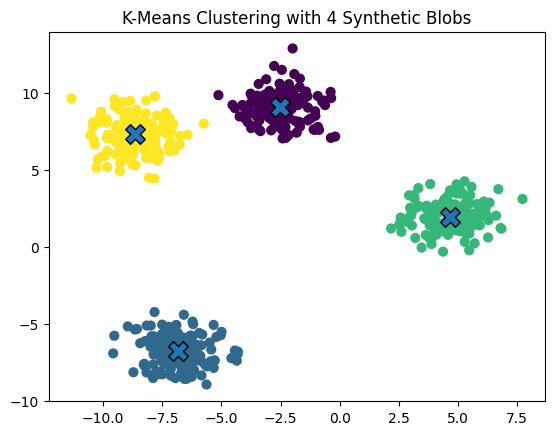

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data with 4 centers
X, y = make_blobs(n_samples=600, centers=4, cluster_std=1.0, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, marker='X', edgecolor='black')
plt.title("K-Means Clustering with 4 Synthetic Blobs")
plt.show()


22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
predicted labels.

In [10]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load Iris dataset
data = load_iris()
X = data.data

# Agglomerative Clustering with 3 clusters
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

# Display first 10 predicted labels
print("First 10 Predicted Labels:")
print(labels[:10])


First 10 Predicted Labels:
[1 1 1 1 1 1 1 1 1 1]


23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

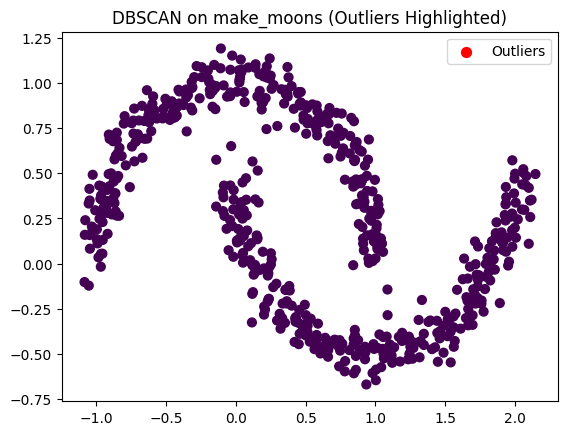

In [11]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate synthetic moon-shaped data
X, y = make_moons(n_samples=600, noise=0.07, random_state=42)

# Apply DBSCAN
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

# Identify outliers (label = -1)
outliers = labels == -1

# Plot results
plt.scatter(X[~outliers, 0], X[~outliers, 1], c=labels[~outliers], s=40)
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=50, label="Outliers")
plt.title("DBSCAN on make_moons (Outliers Highlighted)")
plt.legend()
plt.show()


24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
cluster.

In [12]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Load Wine dataset
data = load_wine()
X = data.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Print cluster sizes
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
{np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

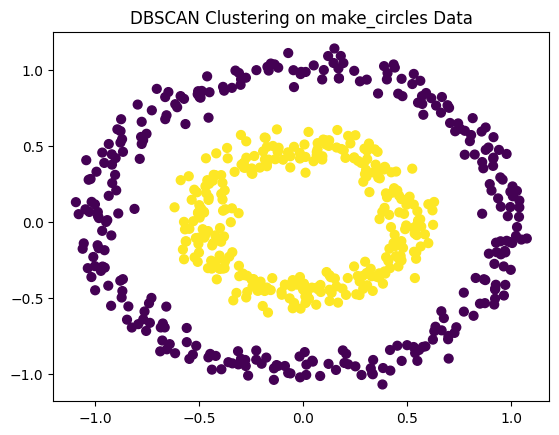

In [13]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate circle-shaped data
X, y = make_circles(n_samples=600, factor=0.5, noise=0.06, random_state=42)

# Apply DBSCAN
db = DBSCAN(eps=0.15, min_samples=5)
labels = db.fit_predict(X)

# Plot clusters (DBSCAN automatically labels noise as -1)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40)
plt.title("DBSCAN Clustering on make_circles Data")
plt.show()


26.  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
centroids.

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load dataset
data = load_breast_cancer()
X = data.data

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Output cluster centroids
print("Cluster Centroids:\n")
print(kmeans.cluster_centers_)


Cluster Centroids:

[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
DBSCAN.

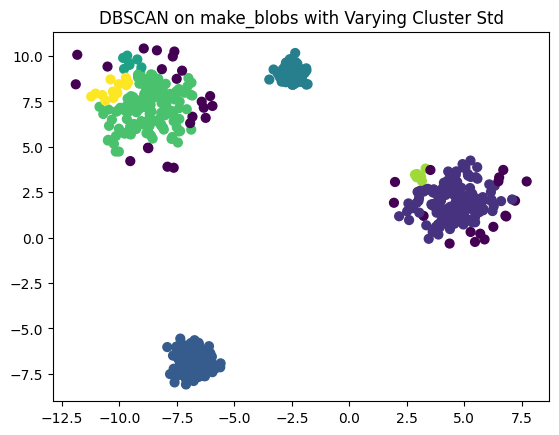

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate synthetic data with varying cluster standard deviations
X, y = make_blobs(
    n_samples=700,
    centers=4,
    cluster_std=[0.3, 1.0, 0.5, 1.2],   # varying densities
    random_state=42
)

# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X)

# Plot the result
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40)
plt.title("DBSCAN on make_blobs with Varying Cluster Std")
plt.show()


28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

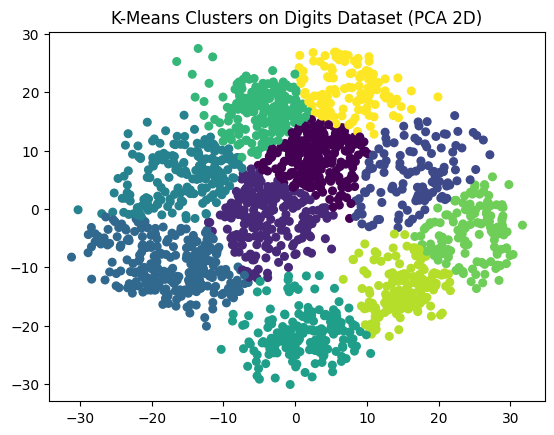

In [16]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=30)
plt.title("K-Means Clusters on Digits Dataset (PCA 2D)")
plt.show()


29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

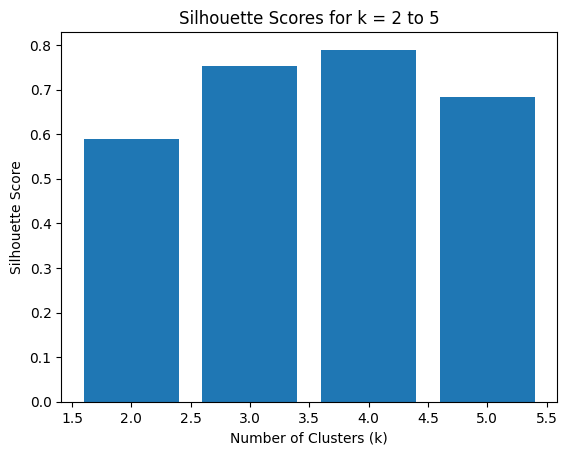

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=700, centers=4, cluster_std=1.0, random_state=42)

sil_scores = []

# Evaluate silhouette score for k = 2 to 5
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

# Plot bar chart
plt.bar([2, 3, 4, 5], sil_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k = 2 to 5")
plt.show()


30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

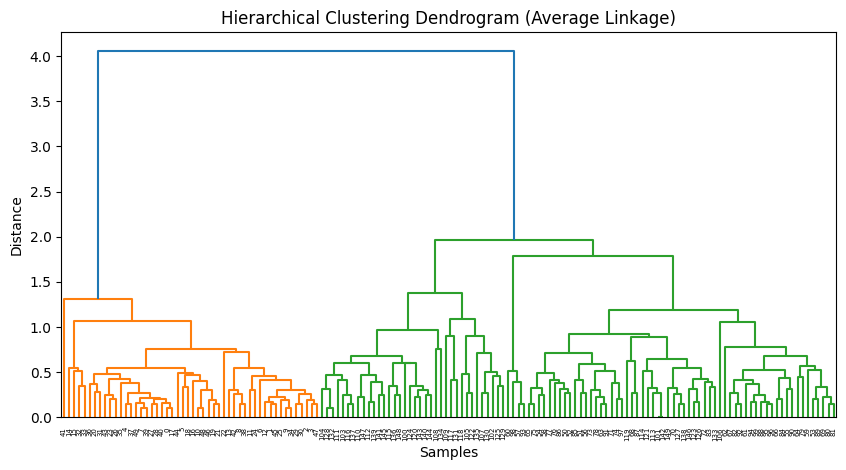

In [18]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load Iris dataset
data = load_iris()
X = data.data

# Perform hierarchical clustering with average linkage
Z = linkage(X, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
decision boundaries.

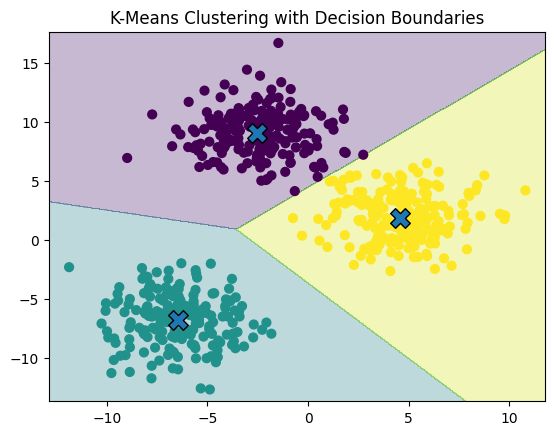

In [19]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate overlapping synthetic data
X, y = make_blobs(n_samples=600,
                  centers=3,
                  cluster_std=2.0,   # larger std = more overlap
                  random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Create decision boundary meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict cluster for each point in the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, marker='X', edgecolor='black')

plt.title("K-Means Clustering with Decision Boundaries")
plt.show()


32.  Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

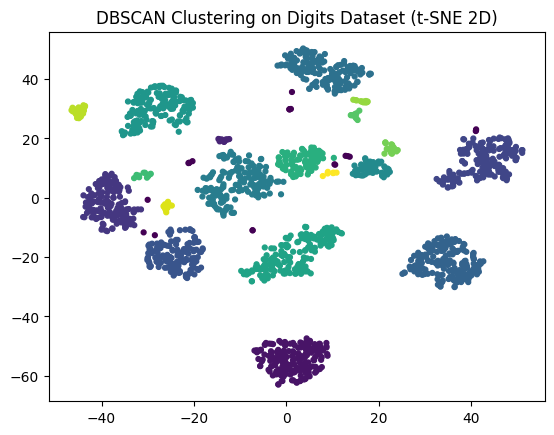

In [20]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Plot the results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, s=12)
plt.title("DBSCAN Clustering on Digits Dataset (t-SNE 2D)")
plt.show()


33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
the result.

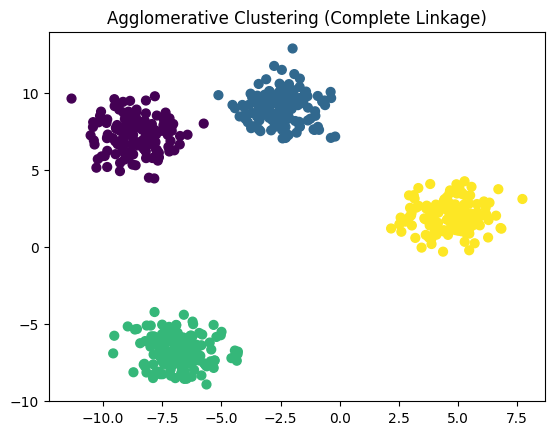

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate synthetic blob data
X, y = make_blobs(
    n_samples=600,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

# Apply Agglomerative Clustering with complete linkage
agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

# Plot the result
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
line plot.

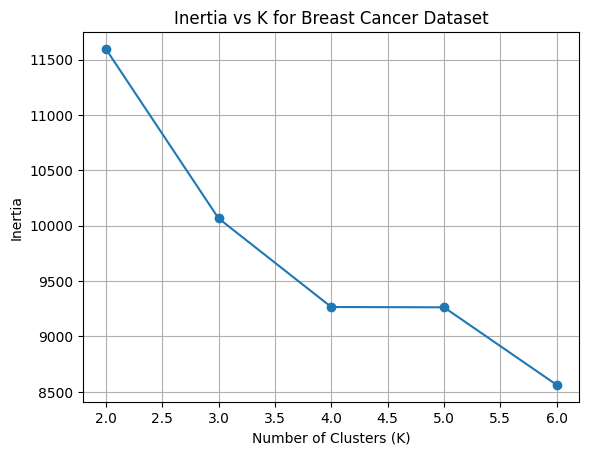

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data

# Scale features (recommended for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate inertia for K = 2 to 6
inertias = []
K_values = range(2, 7)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot inertia values
plt.plot(K_values, inertias, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Inertia vs K for Breast Cancer Dataset")
plt.grid(True)
plt.show()


35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
single linkage.

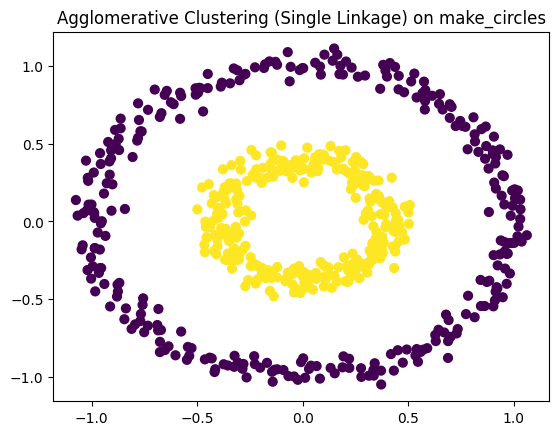

In [23]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate concentric circles
X, y = make_circles(n_samples=600, factor=0.4, noise=0.05, random_state=42)

# Apply Agglomerative Clustering with single linkage
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40)
plt.title("Agglomerative Clustering (Single Linkage) on make_circles")
plt.show()


36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
noise)

In [24]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load Wine dataset
data = load_wine()
X = data.data

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
db = DBSCAN(eps=1.2, min_samples=5)
labels = db.fit_predict(X_scaled)

# Count clusters excluding noise (-1)
unique_labels = set(labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print("Number of clusters (excluding noise):", num_clusters)


Number of clusters (excluding noise): 0


37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
data points.

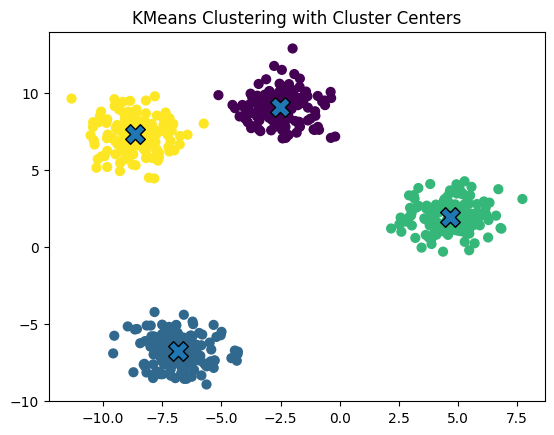

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(
    n_samples=600,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40)

# Plot cluster centers
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    marker='X',
    edgecolor='black'
)

plt.title("KMeans Clustering with Cluster Centers")
plt.show()


38.  Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

In [26]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load Iris dataset
data = load_iris()
X = data.data

# Scale features (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
db = DBSCAN(eps=0.6, min_samples=5)
labels = db.fit_predict(X_scaled)

# Count noise points (label = -1)
noise_count = list(labels).count(-1)

print("Number of noise samples:", noise_count)


Number of noise samples: 26


39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
clustering result.

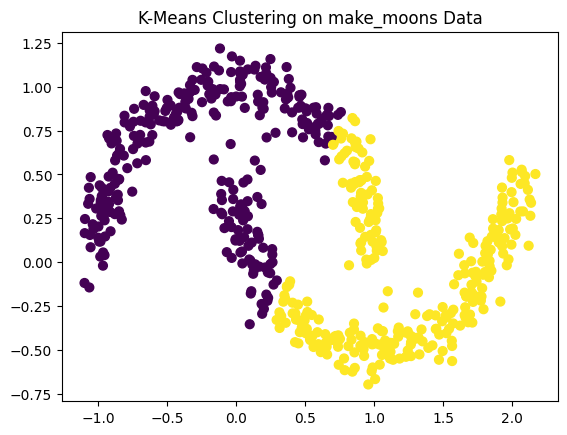

In [27]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate non-linearly separable moon-shaped data
X, y = make_moons(n_samples=600, noise=0.08, random_state=42)

# Apply K-Means (forcing 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Plot the clustering result
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40)
plt.title("K-Means Clustering on make_moons Data")
plt.show()


40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
scatter plot.

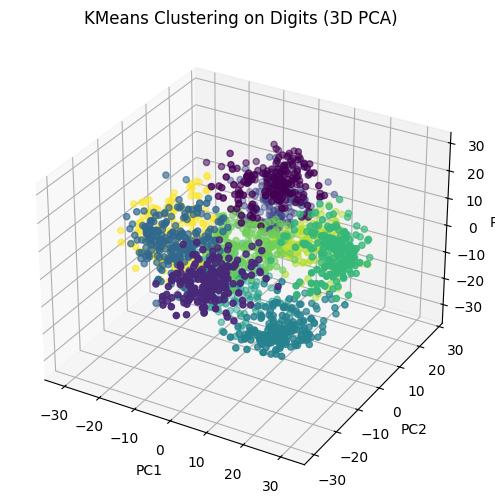

In [28]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 3 principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, s=20)

ax.set_title("KMeans Clustering on Digits (3D PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()


41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
clustering.

In [29]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data with 5 centers
X, y = make_blobs(
    n_samples=800,
    centers=5,
    cluster_std=1.0,
    random_state=42
)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Evaluate clustering using silhouette_score
score = silhouette_score(X, labels)

print("Silhouette Score:", score)


Silhouette Score: 0.6680589312806035


42.  Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
Visualize in 2D.

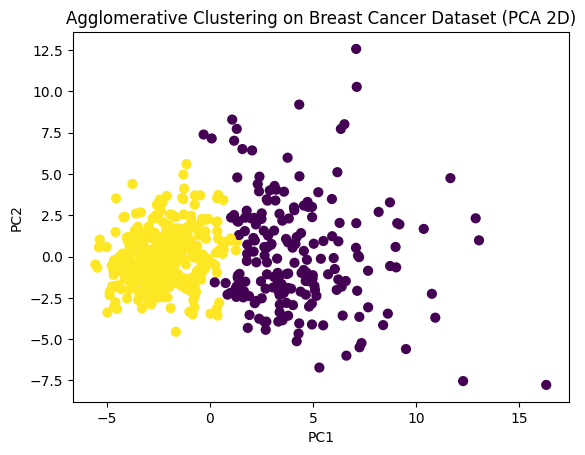

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

# Visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=40)
plt.title("Agglomerative Clustering on Breast Cancer Dataset (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
side-by-side.

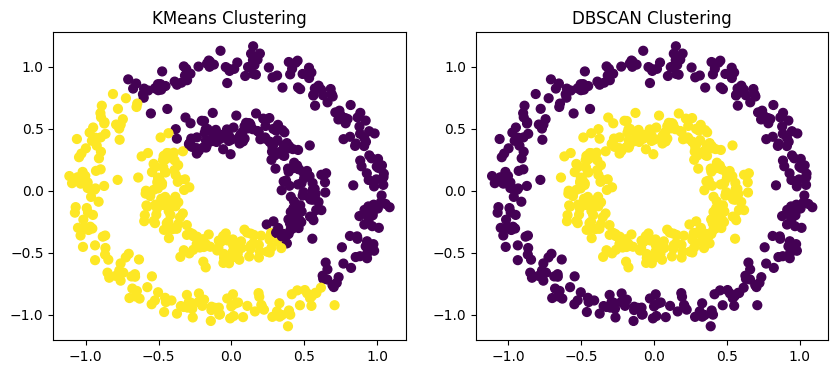

In [31]:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Generate noisy circular data
X, y = make_circles(
    n_samples=600,
    noise=0.07,
    factor=0.5,
    random_state=42
)

# Apply KMeans (force 2 clusters)
kmeans_labels = KMeans(n_clusters=2, random_state=42).fit_predict(X)

# Apply DBSCAN
dbscan_labels = DBSCAN(eps=0.15, min_samples=5).fit_predict(X)

# Plot side-by-side results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("KMeans Clustering")
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=40)

plt.subplot(1, 2, 2)
plt.title("DBSCAN Clustering")
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, s=40)

plt.show()


44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

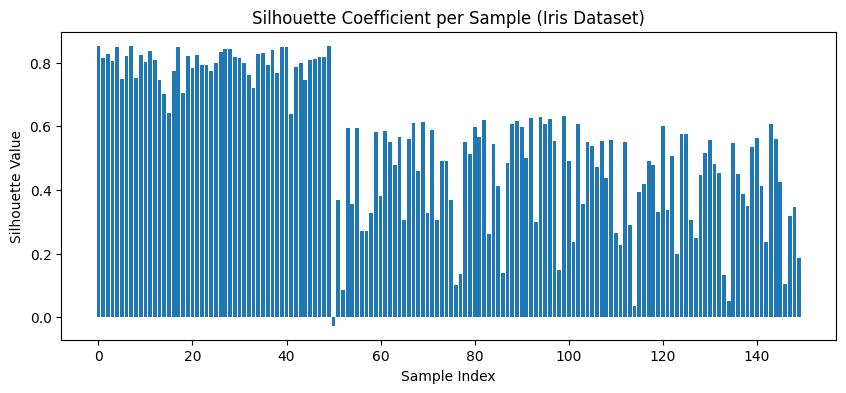

In [32]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X = data.data

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Compute silhouette coefficient for each sample
sil_values = silhouette_samples(X, labels)

# Plot Silhouette Coefficient per sample
plt.figure(figsize=(10, 4))
plt.bar(range(len(sil_values)), sil_values)
plt.title("Silhouette Coefficient per Sample (Iris Dataset)")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Value")
plt.show()


45.  Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
Visualize clusters.

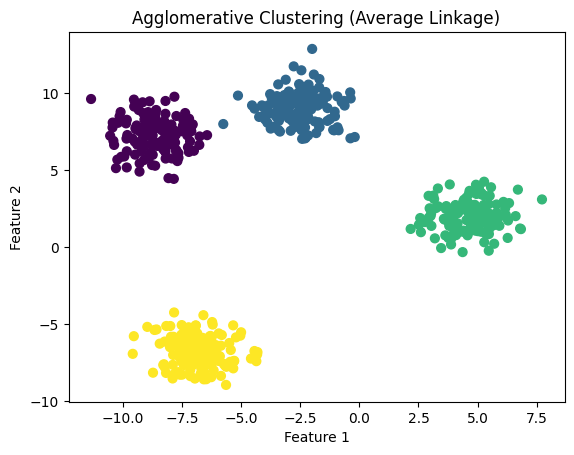

In [33]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate synthetic blob data
X, y = make_blobs(
    n_samples=600,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

# Apply Agglomerative Clustering with 'average' linkage
agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40)
plt.title("Agglomerative Clustering (Average Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
features).

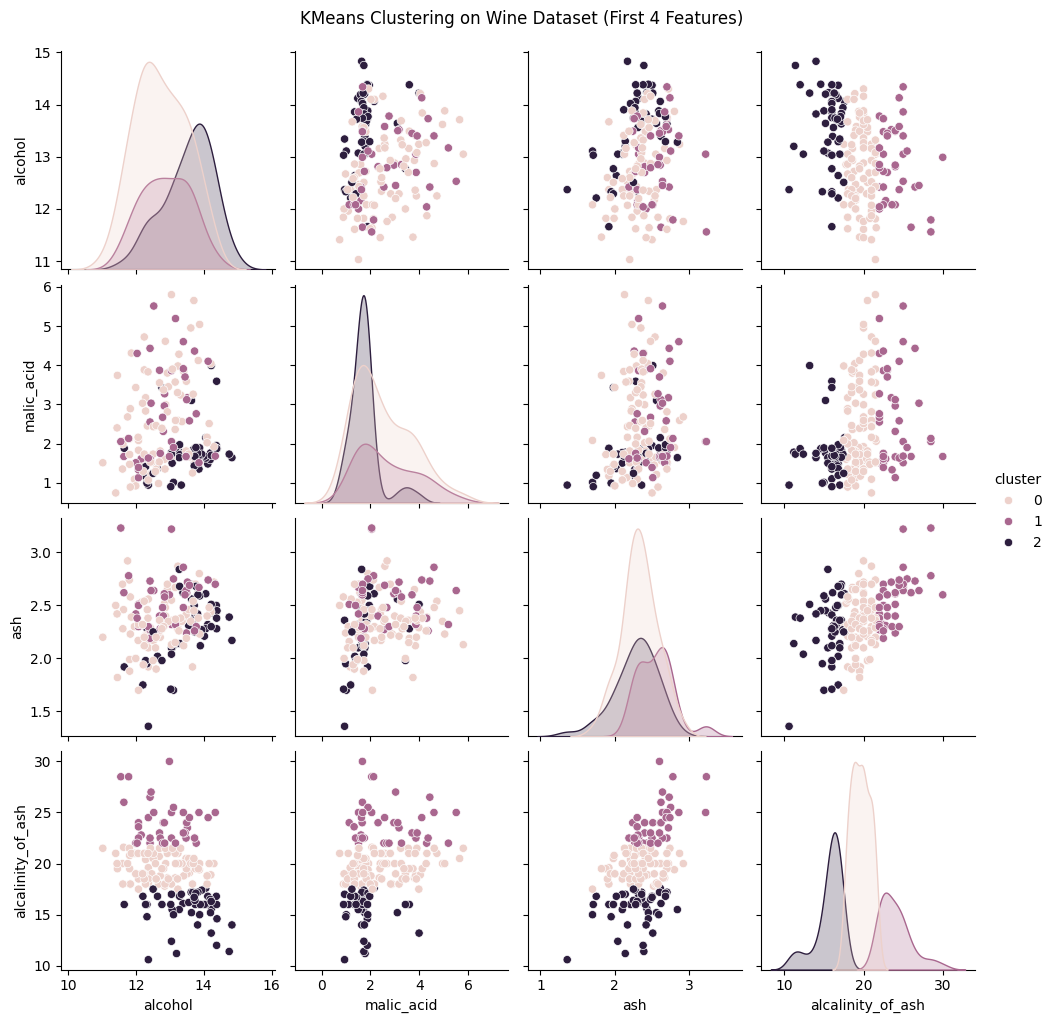

In [34]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Wine dataset
data = load_wine()
X = data.data

# Convert to DataFrame
df = pd.DataFrame(X, columns=data.feature_names)

# Use only first 4 features for pairplot
df_plot = df.iloc[:, :4].copy()

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_plot)

# Add cluster labels to dataframe
df_plot["cluster"] = labels

# Pairplot visualization
sns.pairplot(df_plot, hue="cluster", diag_kind="kde")
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


47.  Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
count.

In [35]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# Generate noisy blob data
X, y = make_blobs(
    n_samples=700,
    centers=4,
    cluster_std=[1.0, 2.0, 0.6, 1.5],   # different noise levels
    random_state=42
)

# Apply DBSCAN
db = DBSCAN(eps=0.8, min_samples=5)
labels = db.fit_predict(X)

# Number of noise points (-1)
noise_count = list(labels).count(-1)

# Number of clusters (exclude noise)
unique_labels = set(labels)
cluster_count = len(unique_labels) - (1 if -1 in unique_labels else 0)

print("Cluster Count:", cluster_count)
print("Noise Points:", noise_count)


Cluster Count: 6
Noise Points: 44


48.  Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
clusters.

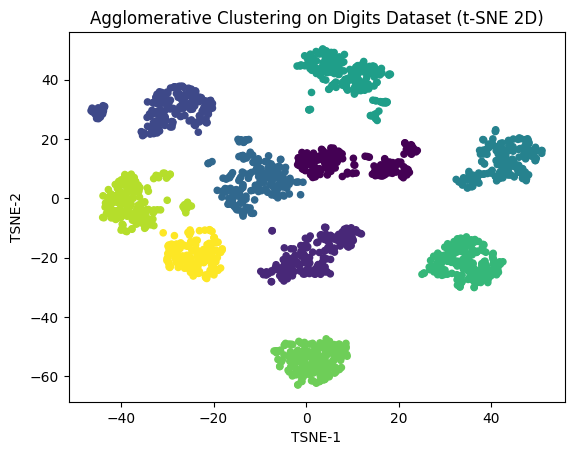

In [36]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_tsne)

# Plot the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, s=20)
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE 2D)")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.show()
